# Dimentionality Reduction

## PCA

### Maximum variance formulation

consider a dataset $\{x_{i}\}$ where $i=1,...,n$ and $x_{i} \in \mathbb{R}^{d}$.

our goal is to project the data onto a space having dimensionality $k < d$ while maximizing the variance of the projected data. 

to begin with, consider the projection onto a one-dimensional space$(k=1)$.

we can define the direction of this space by a vector $u_{1} \in \mathbb{R}^{d}$, we can choose $u_{1}$ to be a unit vector so that $u_{1}^{T}u_{1} = 1$.

each data point $x_{i}$ is then projected onto a scalar value $u_{1}^{T}x_{i}$, then mean of the projected data:

$$\frac{1}{n}\sum_{i=1}^{n}u_{1}^{T}x_{i} = u_{1}^{T}\overline{x}$$

the variance of the projected data:

$$\frac{1}{n}\sum_{i=1}^{n}(u_{1}^{T}x_{i} - u_{1}^{T}\overline{x})^{2} = \frac{1}{n}\sum_{i=1}^{n}u_{1}^{T}(x_{i} - \overline{x})(x_{i} - \overline{x})^{T}u_{1} = u_{1}^{T}Su_{1}$$

where

$$S = \frac{1}{n}\sum_{i=1}^{n}(x_{i} - \overline{x})(x_{i} - \overline{x})^{T}$$

now we can formalize our problem as:

$$\underset{u_{1}}{min}\ -u_{1}^{T}Su_{1}$$
$$s.t\quad u_{1}^{T}u_{1} = 1$$

the lagrangian of this optimization problem:

$$L(u_{1}, \lambda_{1}) = -u_{1}^{T}Su_{1} + \lambda_{1}(u_{1}^{T}u_{1} - 1)$$

the primal:

$$\underset{u_{1}}{min}\ \underset{\lambda_{1}}{max}\ L(u_{1}, \lambda_{1})$$

primal satisfy the KKT conditions, so equivalent to dual:

$$\underset{\lambda_{1}}{max}\ \underset{u_{1}}{min}\ L(u_{1}, \lambda_{1})$$

setting the derivative with respect to $u_{1}$ equal to zero, we have:

$$Su_{1} = \lambda_{1}{u_{1}}$$

which say that $u_{1}$ must be a eigenvector of $S$, if we left-multiply by $u_{1}^{T}$ and make use of $u_{1}^{T}u_{1} = 1$, we get:

$$u_{1}^{T}Su_{1} = \lambda_{1}$$

and so the variance will be a maximum when we set $u_{1}$ equal to the eigenvector having the largest eigenvalue $\lambda_{1}$. this eigenvector is known as the first principal component.

we can define the additional principal components in an increamental fashion by choosing each new direction to be that which maximizes the projected variance amongst all possible directions orthogonal to those already considered.

second principal component:

$$\underset{u_{2}}{min}\ -u_{2}^{T}Su_{2}$$
$$s.t\quad u_{2}^{T}u_{2} = 1, u_{1}^{T}u_{2} = 0$$

like before, using lagrangian we derive:

$$Su_{2} = \lambda_{2}{u_{2}} + \phi{u_{1}}$$

left multiply by $u_{1}^{T}$:

$$u_{1}^{T}Su_{2} = \lambda_{2}u_{1}^{T}{u_{2}} + \phi{u_{1}^{T}}{u_{1}}$$

analyzing each component:

$$u_{1}^{T}Su_{2} = u_{2}^{T}Su_{1} = u_{2}^{T}\lambda_{1}u_{1} = \lambda{u_{1}^{T}u_{2}} = 0$$
$$u_{1}^{T}{u_{2}} = 0$$
$${u_{1}^{T}}{u_{1}} = 1$$

we get:

$$\phi = 0$$

back to zero derivative we have:

$$Su_{2} = \lambda_{2}{u_{2}}$$
$$u_{2}^{T}Su_{2} = \lambda_{2}$$

so $\lambda_{2}$ is the second largest eigenvalue of $S$.

by induction, we can show that $i$-th principal component is the $i$-th largest eigenvector of $S$.

### properties of non-negative definite symmetric real matrix

$$S = \frac{1}{n}\sum_{i=1}^{n}(x_{i} - \overline{x})(x_{i} - \overline{x})^{T}$$ 

is of that kind.

### Minimum-error formulation

a complete orthonormal basis vectors $u_{i}$ in $\mathbb{R}^{d}$:

$$u_{i}^{T}u_{j} = \delta_{ij}$$

$x_{k}$ coordinate with respect to $u_{i}$ is $x_{k}^{T}u_{i}$, so:

$$x_{k} = \sum_{i=1}^{d}(x_{k}^{T}u_{i})u_{i}$$

$x_{k}$ can be approximated by the $m$-dimensional subspace representation plus a constant:

$$\tilde{x}_{k} = \sum_{i=1}^{m}z_{ki}u_{i} + \sum_{i=m+1}^{d}b_{i}u_{i}$$

where $z_{ki}$ depend on the particular data point, whereas ${b_{i}}$ are constants that are the same for all data points.

our goal is to minimize:

$$J = \frac{1}{n}\sum_{k=1}^{d}\left \| x_{k} - \tilde{x}_{k} \right \|^{2} $$

setting the derivative with respect to $z_{ni}$ to zero, and making use of the orthonormality conditions, we obtain:

$$z_{ni} = x_{n}^{T}u_{i}$$

similarly, we obtain:

$$b_{i} = \overline{x}^{T}u_{i}$$

substitude for $z_{ni}$ and $b_{i}$, we obtain:

$$x_{k} - \tilde{x}_{k} = \sum_{i=m+1}^{d}((x_{k} - \overline{x}_{k})^{T}u_{i})u_{i}$$

finally our goal is to minimize:

$$J = \frac{1}{n}\sum_{k=1}^{n}\sum_{i=m+1}^{d}(x_{k} - \overline{x}_{k})^{2} = \sum_{i=m+1}^{d}u_{i}^{T}Su_{i}$$

this is similar to the maximum variance formulation in the opposite direction.

### manual data

In [1]:
"""construct dataset"""
import numpy as np

m = 100
w1, w2 = 0.1, 0.3
noise = 0.2

X = np.empty((m, 3))
X[:, :2] = np.random.multivariate_normal([0, 0], [[2, 1], [1, 5]], m)
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

X2D[: 5]

array([[-0.40565221, -1.69570572],
       [-1.65068551,  0.30621659],
       [-0.4562352 ,  0.33505227],
       [ 1.23654634, -1.16955408],
       [-2.39337295,  0.04917042]])

In [3]:
"""sklearn actually uses SVD"""
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

X2D_SVD = X_centered.dot(Vt.T[:, :2])
X2D_SVD[: 5]

array([[ 0.40565221,  1.69570572],
       [ 1.65068551, -0.30621659],
       [ 0.4562352 , -0.33505227],
       [-1.23654634,  1.16955408],
       [ 2.39337295, -0.04917042]])

### mnist data

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
"""
set n_components (0.0, 1.0), indicating the ratio of variance you wish to preserve
use inverse_transform trying to inverse
"""
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_mnist = pca.inverse_transform(X_reduced)

In [6]:
pca.explained_variance_ratio_[: 10]

array([0.09756334, 0.07156108, 0.06168814, 0.05388291, 0.04877275,
       0.04311341, 0.03261168, 0.0289652 , 0.02763173, 0.02347036])

In [7]:
"""IncrementalPCA"""
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

....

### swiss roll

In [8]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [9]:
"""kernel pca"""
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## Locally Linear Embedding(LLE)

LLE works by first measuring how each training instance linearly relates to it's colsest neighbors (c.n)

then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

LLE step one: linearly modeling local relationships:

$$
\begin{equation}
\begin{split}
\hat{W} &= \underset{W}{argmin}\sum_{i=1}^{m}\left(x^{(i)} - \sum_{j=1}^{m}w_{ij}x^{(j)}\right)^{2}\\
\mbox{s.t }\ &1.w_{ij} = 0 \mbox{ if } x^{(j)} \mbox{ is not one of c.n of } x^{(i)} \\
&2.\sum_{i=1}^{m}w_{ij} = 1 \mbox{ for all }j
\end{split}
\end{equation}
$$

LLE second step doing the reverse: keeping the weights fixed and finding the optimal position of the instances' image in low-dimensional space, suppose $x^{(i)}$'s low-dimensional image is $z^{(i)}$.

$$
\begin{equation}
\begin{split}
\hat{Z} &= \underset{Z}{argmin}\sum_{i=1}^{m}\left(z^{(i)} - \sum_{j=1}^{m}w_{ij}z^{(j)}\right)^{2}\\
\mbox{s.t }\ &1.\sum_{i=1}^{m}z^{(i)} = 0\\
&2.\sum_{i=1}^{m}(z^{(i)}z^{(i)})^{T} = mI_{d}
\end{split}
\end{equation}
$$

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

## Exercise

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

rnd_clf = RandomForestClassifier(n_estimators=1000, max_depth=4, n_jobs=-1, random_state=42)
low_clf = clone(rnd_clf)

In [12]:
from datetime import datetime
from sklearn.metrics import accuracy_score

pre_time = datetime.now()
rnd_clf.fit(X_train, y_train)
print((datetime.now() - pre_time).seconds)
accuracy_score(y_test, rnd_clf.predict(X_test))

19


0.8194285714285714

In [13]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [14]:
pre_time = datetime.now()
low_clf.fit(X_train_reduced, y_train)
print((datetime.now() - pre_time).seconds)
accuracy_score(y_test, low_clf.predict(X_test_reduced))

20


0.8050857142857143

In [15]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

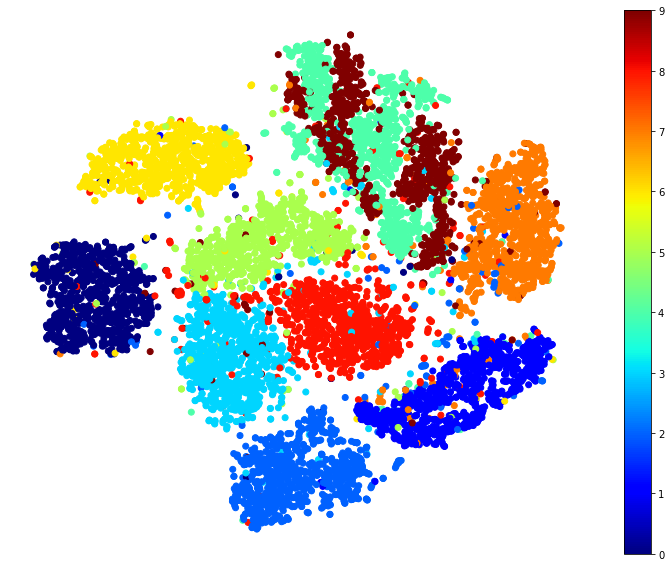

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()